# Comparison between the decision boundaries of common classifiers

## Import the data into Python

In [73]:
import os
os.listdir()
df = pd.read_csv("naive_bayes.csv")
df.head()

,x,y,label
0,3.268984,0.188852,1
1,2.211140,2.264785,1
2,1.148187,-0.344318,1
3,2.483661,1.207841,1
4,1.519653,-0.310487,1


In [74]:
# Develop a decision boundary function to compare the models

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

# EDA ( Exploratory data analysis)

In [76]:
df.shape

(220, 3)

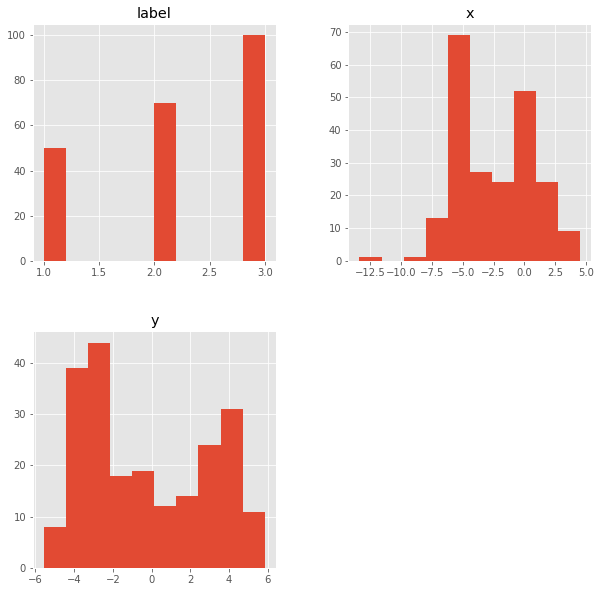

In [77]:
plt.style.use("ggplot")
df.hist(figsize=(10,10))
plt.savefig("EDA.jpg")

          x         y  label
0  3.268984  0.188852      1
1  2.211140  2.264785      1
2  1.148187 -0.344318      1
3  2.483661  1.207841      1
4  1.519653 -0.310487      1


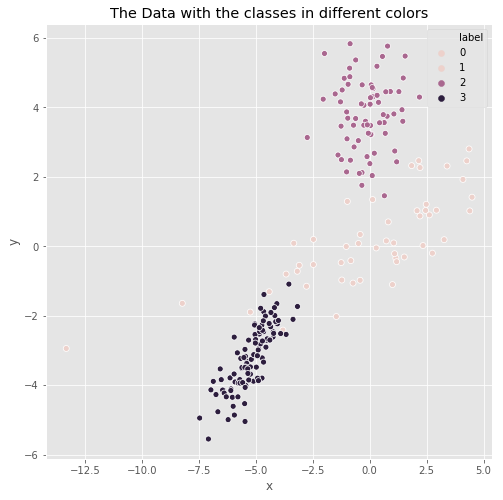

In [108]:
import seaborn as sns
print(df.head())
plt.figure(figsize =(8,8))
sns.scatterplot(data =df,hue ="label",x= "x",y = "y",)
plt.title("The Data with the classes in different colors")
plt.savefig("Classes.jpg")
plt.show()


# Data Modelling

## Data Split

In [78]:
# Data split
from sklearn.model_selection import train_test_split
X = df.drop("label",1)
Y = df.label
X_train,X_test,y_train,y_test =train_test_split(X,Y,random_state =1,test_size =0.2)

## KNearest Neighbours Classifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [115]:
# test the model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
pred = model.predict(X_test)
print(f" the accuracy score  fro KNN classifier is {accuracy_score(pred,y_test)}")
confusion_matrix(pred,y_test)

 the accuracy score  fro KNN classifier is 0.9545454545454546


array([[13,  0,  0],
       [ 1, 14,  0],
       [ 1,  0, 15]], dtype=int64)

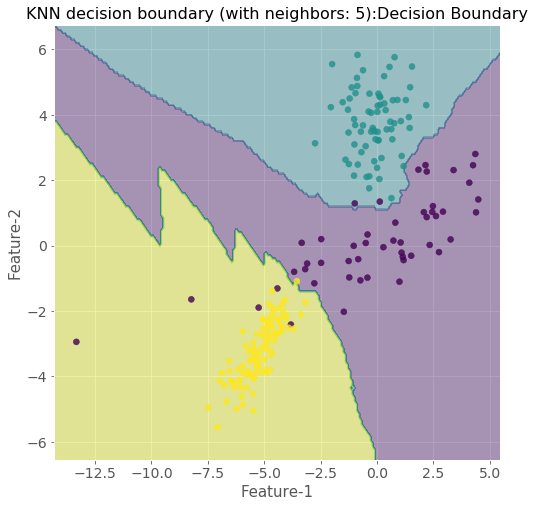

In [116]:
plt.figure(figsize=(8,8))
plt.title("KNN decision boundary (with neighbors: 5):Decision Boundary",fontsize=16)
plot_decision_boundaries(X,Y,KNeighborsClassifier,n_neighbors=5)
plt.savefig("KNN.jpg")
plt.show()


## Random forest

In [117]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
# test the model
pred = model.predict(X_test)
print(f" the accuracy score  for Random Forest classifier is {accuracy_score(pred,y_test)}")
confusion_matrix(pred,y_test)

 the accuracy score  for Random Forest classifier is 0.9545454545454546


array([[13,  0,  0],
       [ 1, 14,  0],
       [ 1,  0, 15]], dtype=int64)

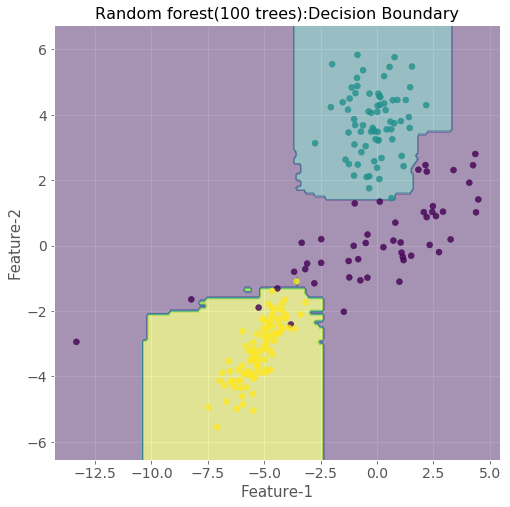

In [110]:

plt.figure(figsize = (8,8))
plt.title("Random forest(100 trees):Decision Boundary",fontsize=16)
plot_decision_boundaries(X,Y,RandomForestClassifier,n_estimators =100)
plt.savefig("RF.jpg")
plt.show()


## Naive Bayes Classifier

In [85]:
# Naive Bayes model

from sklearn.naive_bayes import GaussianNB as NB

model = NB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
# test the model
pred = model.predict(X_test)
print(f" the accuracy score  for Naive Bayes classifier is {accuracy_score(pred,y_test)}")
confusion_matrix(pred,y_test)

 the accuracy score  for Naive Bayes classifier is 0.9545454545454546


array([[13,  0,  0],
       [ 2, 14,  0],
       [ 0,  0, 15]], dtype=int64)

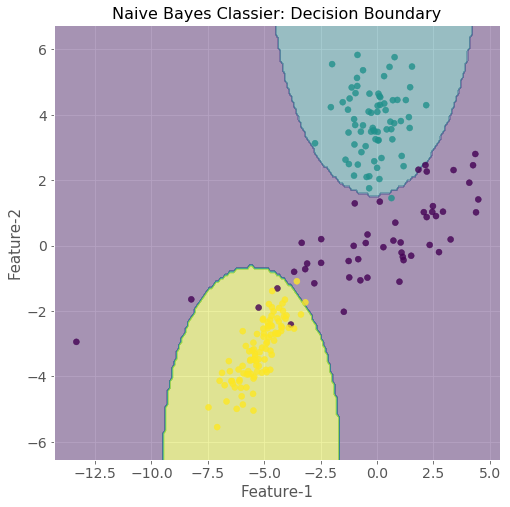

In [111]:


plt.figure(figsize =(8,8))
plt.title("Naive Bayes Classier: Decision Boundary",fontsize=16)
plot_decision_boundaries(X,Y,NB)
plt.savefig("naive_bayes.jpg")
plt.show()